In [80]:
import pandas as pd
import numpy as np


from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn import tree

from sklearn.datasets import load_iris

import seaborn as sns
import matplotlib.pyplot as plt

In [81]:
wine = pd.read_csv('white_wine.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0


In [82]:
wine = wine[['alcohol','density','quality']]
wine.head()

,alcohol,density,quality
0,8.8,1.0010,6.0
1,9.5,0.9940,6.0
2,10.1,0.9951,6.0
3,9.9,0.9956,6.0
4,9.9,0.9956,6.0


In [83]:
wine.dropna(inplace=True)
wine.isnull().sum()

alcohol    0
density    0
quality    0
dtype: int64

In [84]:
wine['quality'] = np.where(wine['quality']>6,1,0)
wine

,alcohol,density,quality
0,8.8,1.0010,0
1,9.5,0.9940,0
2,10.1,0.9951,0
3,9.9,0.9956,0
4,9.9,0.9956,0
...,...,...,...
514,10.3,1.0002,1
515,10.4,0.9926,0
516,9.1,0.9934,0
517,10.4,0.9920,0


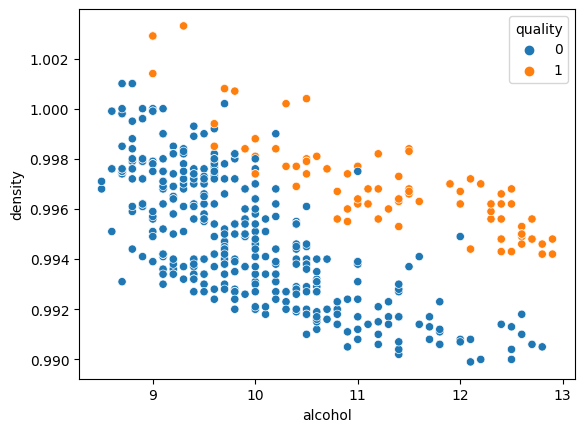

In [85]:
plt.figure()

sns.scatterplot(
    data=wine,
    x='alcohol',
    y='density',
    hue='quality'
)

plt.show()

In [86]:
from sklearn.model_selection import train_test_split

feature = wine[['alcohol','density']]
label = wine['quality']
xtrain,xtest, ytrain, ytest = train_test_split(feature,label,test_size=0.2,random_state=42,stratify=label)

In [87]:
np.unique(ytrain,return_counts=True)

(array([0, 1]), array([337,  78]))

In [88]:
np.unique(ytest,return_counts=True)

(array([0, 1]), array([84, 20]))

In [93]:
tree = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=3
) # OBJEK TREE
tree.fit(xtrain,ytrain) #DISURUH BELAJAR

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [94]:
label_train = np.where(ytrain==0, 'Good', 'Bad')

In [95]:
tree.feature_importances_

array([0.40578479, 0.59421521])

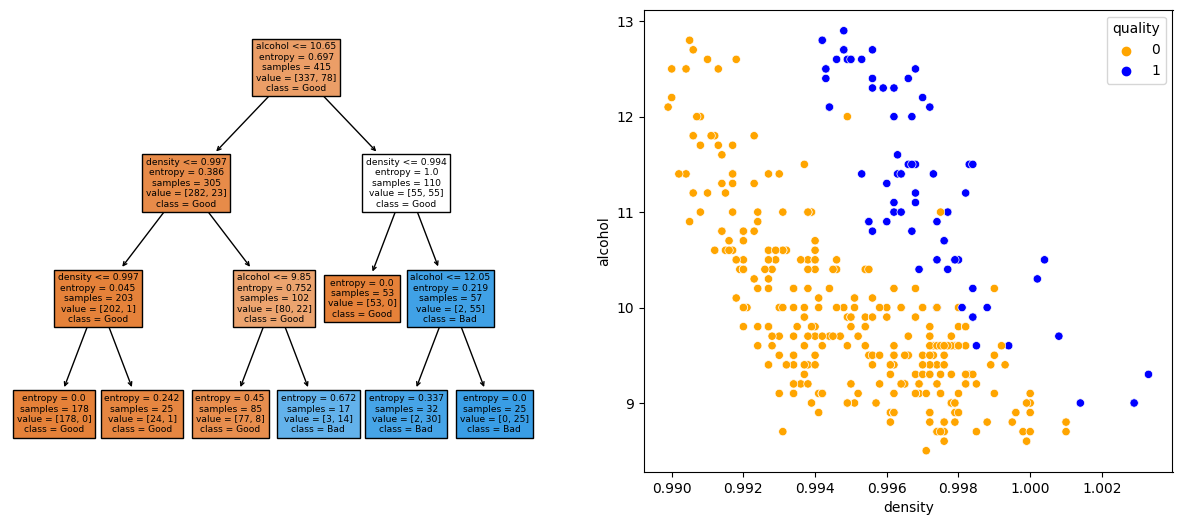

In [96]:
plt.figure(figsize=(15,6))

plt.subplot(121)
plot_tree(tree, feature_names=xtrain.columns, class_names=['Good','Bad'],filled=True)

plt.subplot(122)
pallete = {
    0:'orange',
    1:'blue'
}
sns.scatterplot(
    x=xtrain['density'],
    y=xtrain['alcohol'],
    hue=ytrain,
    palette=pallete
)

plt.show()